<a href="https://colab.research.google.com/github/umang66782/Plaksha/blob/main/Server_load_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Server Load Predcition**


In [ ]:
# data analysis and wrangling
import pandas as pd 
import numpy as np 

# visualization
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, log_loss
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier



## Load Data 

In [ ]:
df= pd.read_csv("../input/plaksha21-cm005-project/train.csv")
df1= pd.read_csv("../input/plaksha21-cm005-project/test.csv")


## Exploring and Preprocessing the train data



In [ ]:
df.head()

,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,...,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec,cpu_load
0,c,38.50,458.07,0.00,0.0,259,22,0.4,0.00,170323,...,0,415.483,479.983,15.367,20.667,281.383,245.533,278.767,277.300,medium
1,a,66.43,657.65,0.43,0.0,272,12,23.8,0.40,121776,...,0,526.533,554.550,67.300,88.650,438.583,401.633,436.000,366.183,medium
2,f,29.07,322.25,0.00,0.0,171,10,0.0,0.00,271435,...,0,337.967,314.067,0.667,0.017,230.333,230.050,220.200,240.333,low
3,e,1063.13,286.92,4.08,0.0,253,10,0.0,0.15,171316,...,0,336.000,379.833,24.250,33.400,249.767,251.300,178.183,139.733,high
4,f,22.97,369.32,0.00,0.0,165,10,0.0,0.00,280388,...,0,300.833,314.983,0.733,0.017,295.583,257.300,274.200,237.250,low


In [ ]:
df.shape


(119782, 88)

In [ ]:
df.columns

Index(['m_id', 'syst_direct_ipo_rate', 'syst_buffered_ipo_rate',
       'syst_page_fault_rate', 'syst_page_read_ipo_rate', 'syst_process_count',
       'syst_other_states', 'page_page_write_ipo_rate',
       'page_global_valid_fault_rate', 'page_free_list_size',
       'page_modified_list_size', 'io_mailbox_write_rate',
       'io_split_transfer_rate', 'io_file_open_rate', 'io_logical_name_trans',
       'io_page_reads', 'io_page_writes', 'page_free_list_faults',
       'page_modified_list_faults', 'page_demand_zero_faults', 'state_compute',
       'state_mwait', 'state_lef', 'state_hib', 'state_cur', 'app06_dirio',
       'app06_bufio', 'app06_pgflts', 'app06_proccount', 'app06_pagesgbl',
       'app06_pagesproc', 'app07_dirio', 'app07_bufio', 'app07_pgflts',
       'app07_proccount', 'app07_pagesgbl', 'app07_pagesproc', 'app04_dirio',
       'app04_bufio', 'app04_pgflts', 'app04_proccount', 'app04_pagesgbl',
       'app04_pagesproc', 'app08_dirio', 'app08_bufio', 'app08_pgflts',
    

In [ ]:
df.describe()

,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
count,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,...,119782.000000,119782.000000,1.197820e+05,1.197820e+05,119782.000000,119782.000000,1.197820e+05,1.197820e+05,1.197820e+05,1.197820e+05
mean,163.301465,684.666261,7.421276,1.606043,243.818529,10.850871,7.229671,2.366581,176817.446202,68123.317477,...,0.075888,0.508833,2.063725e+08,1.375818e+08,31.279652,42.382363,4.687999e+12,7.188179e+12,6.563013e+12,5.313130e+12
std,547.578970,1435.427676,79.390552,21.437873,43.397069,5.428206,8.247744,23.459765,53470.917016,20073.343007,...,0.337381,3.486546,2.915828e+10,2.380783e+10,24.287782,33.278828,4.188527e+14,5.186389e+14,4.955808e+14,4.458990e+14
min,0.000000,0.000000,0.000000,0.000000,165.000000,1.000000,0.000000,0.000000,84609.000000,39823.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.633000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,34.100000,350.370000,0.000000,0.000000,217.000000,10.000000,0.300000,0.000000,132817.000000,54668.000000,...,0.000000,0.000000,3.204500e+02,3.556500e+02,16.200000,21.583000,2.625670e+02,2.450170e+02,2.543670e+02,2.440330e+02
50%,42.850000,558.300000,0.000000,0.000000,247.000000,10.000000,4.430000,0.000000,177264.000000,60634.000000,...,0.000000,0.000000,3.874500e+02,4.642500e+02,21.633000,28.983000,3.273330e+02,3.022915e+02,3.172670e+02,3.014330e+02
75%,70.370000,712.680000,0.020000,0.000000,271.000000,12.000000,11.150000,0.000000,197856.750000,92905.000000,...,0.000000,0.000000,4.601457e+02,5.553170e+02,64.683000,88.733000,4.181000e+02,3.936790e+02,4.097670e+02,3.995830e+02
max,11567.100000,15169.270000,4305.720000,738.820000,323.000000,23.000000,83.330000,788.580000,280780.000000,105380.000000,...,6.000000,54.000000,4.119986e+12,4.119987e+12,78.933000,108.317000,3.743147e+16,3.743147e+16,3.743147e+16,3.743147e+16


## Visualization(Histogram)

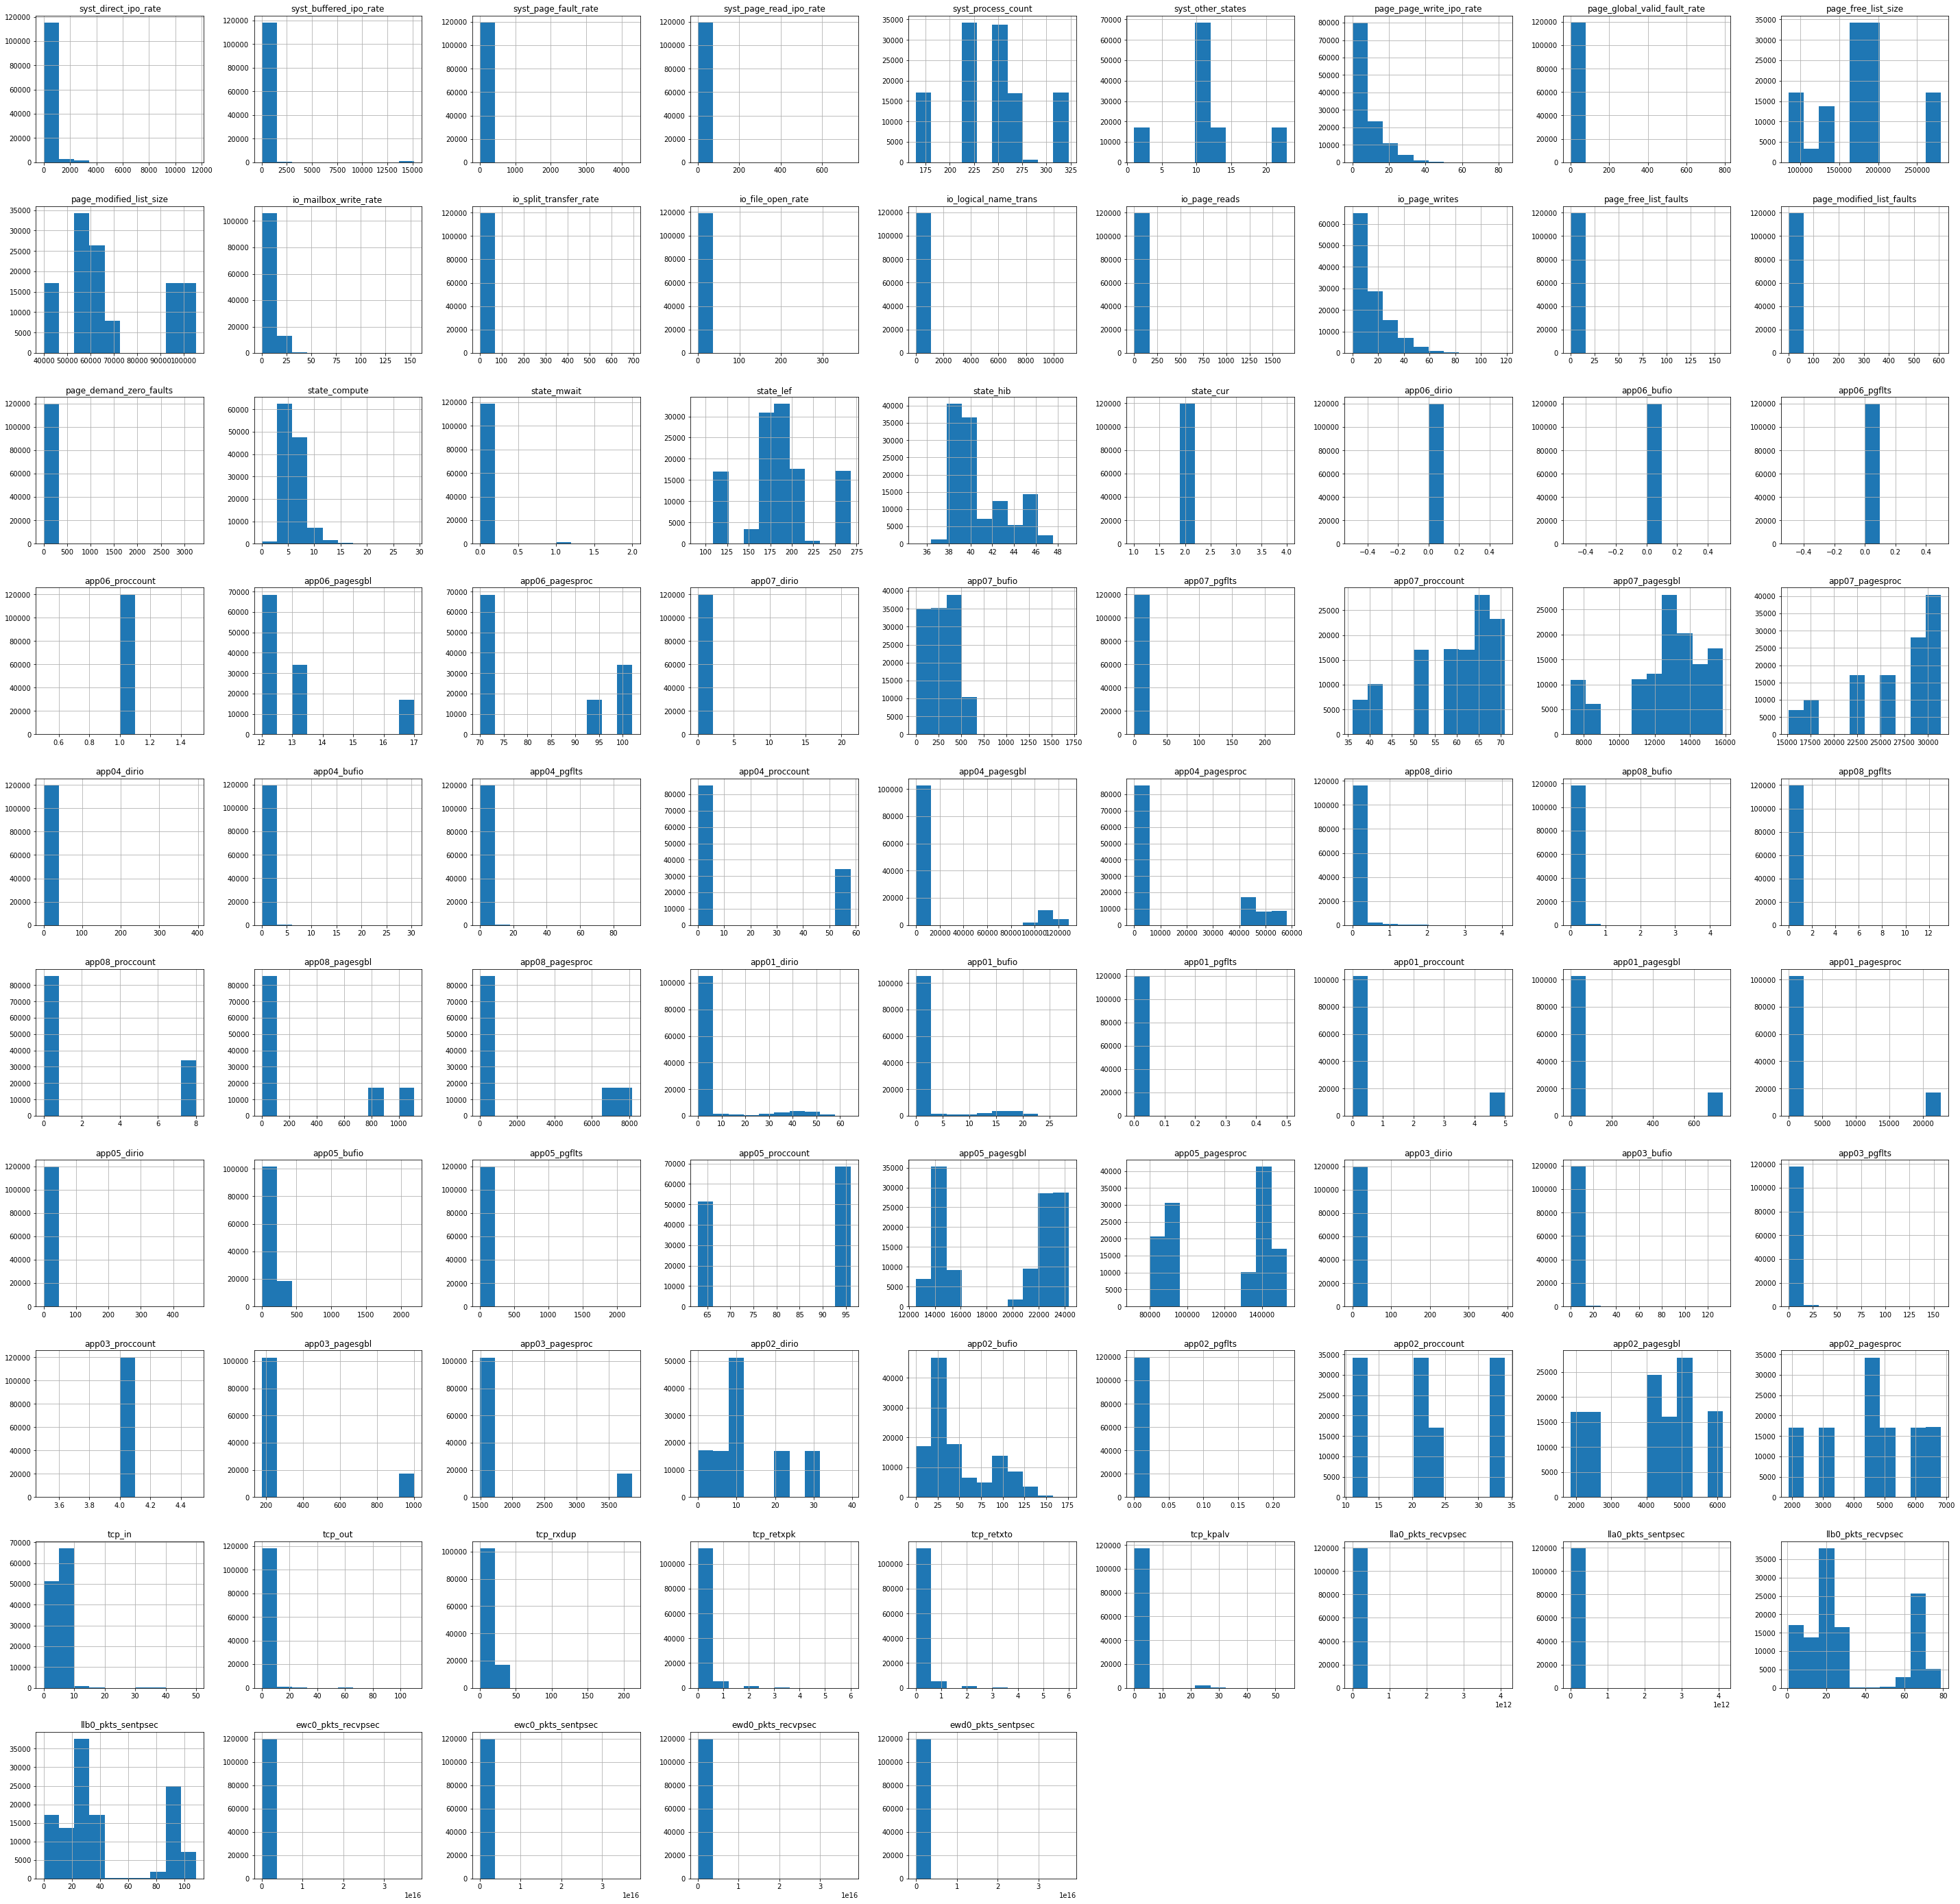

In [ ]:
df.hist(figsize=(50,50))
plt.show()

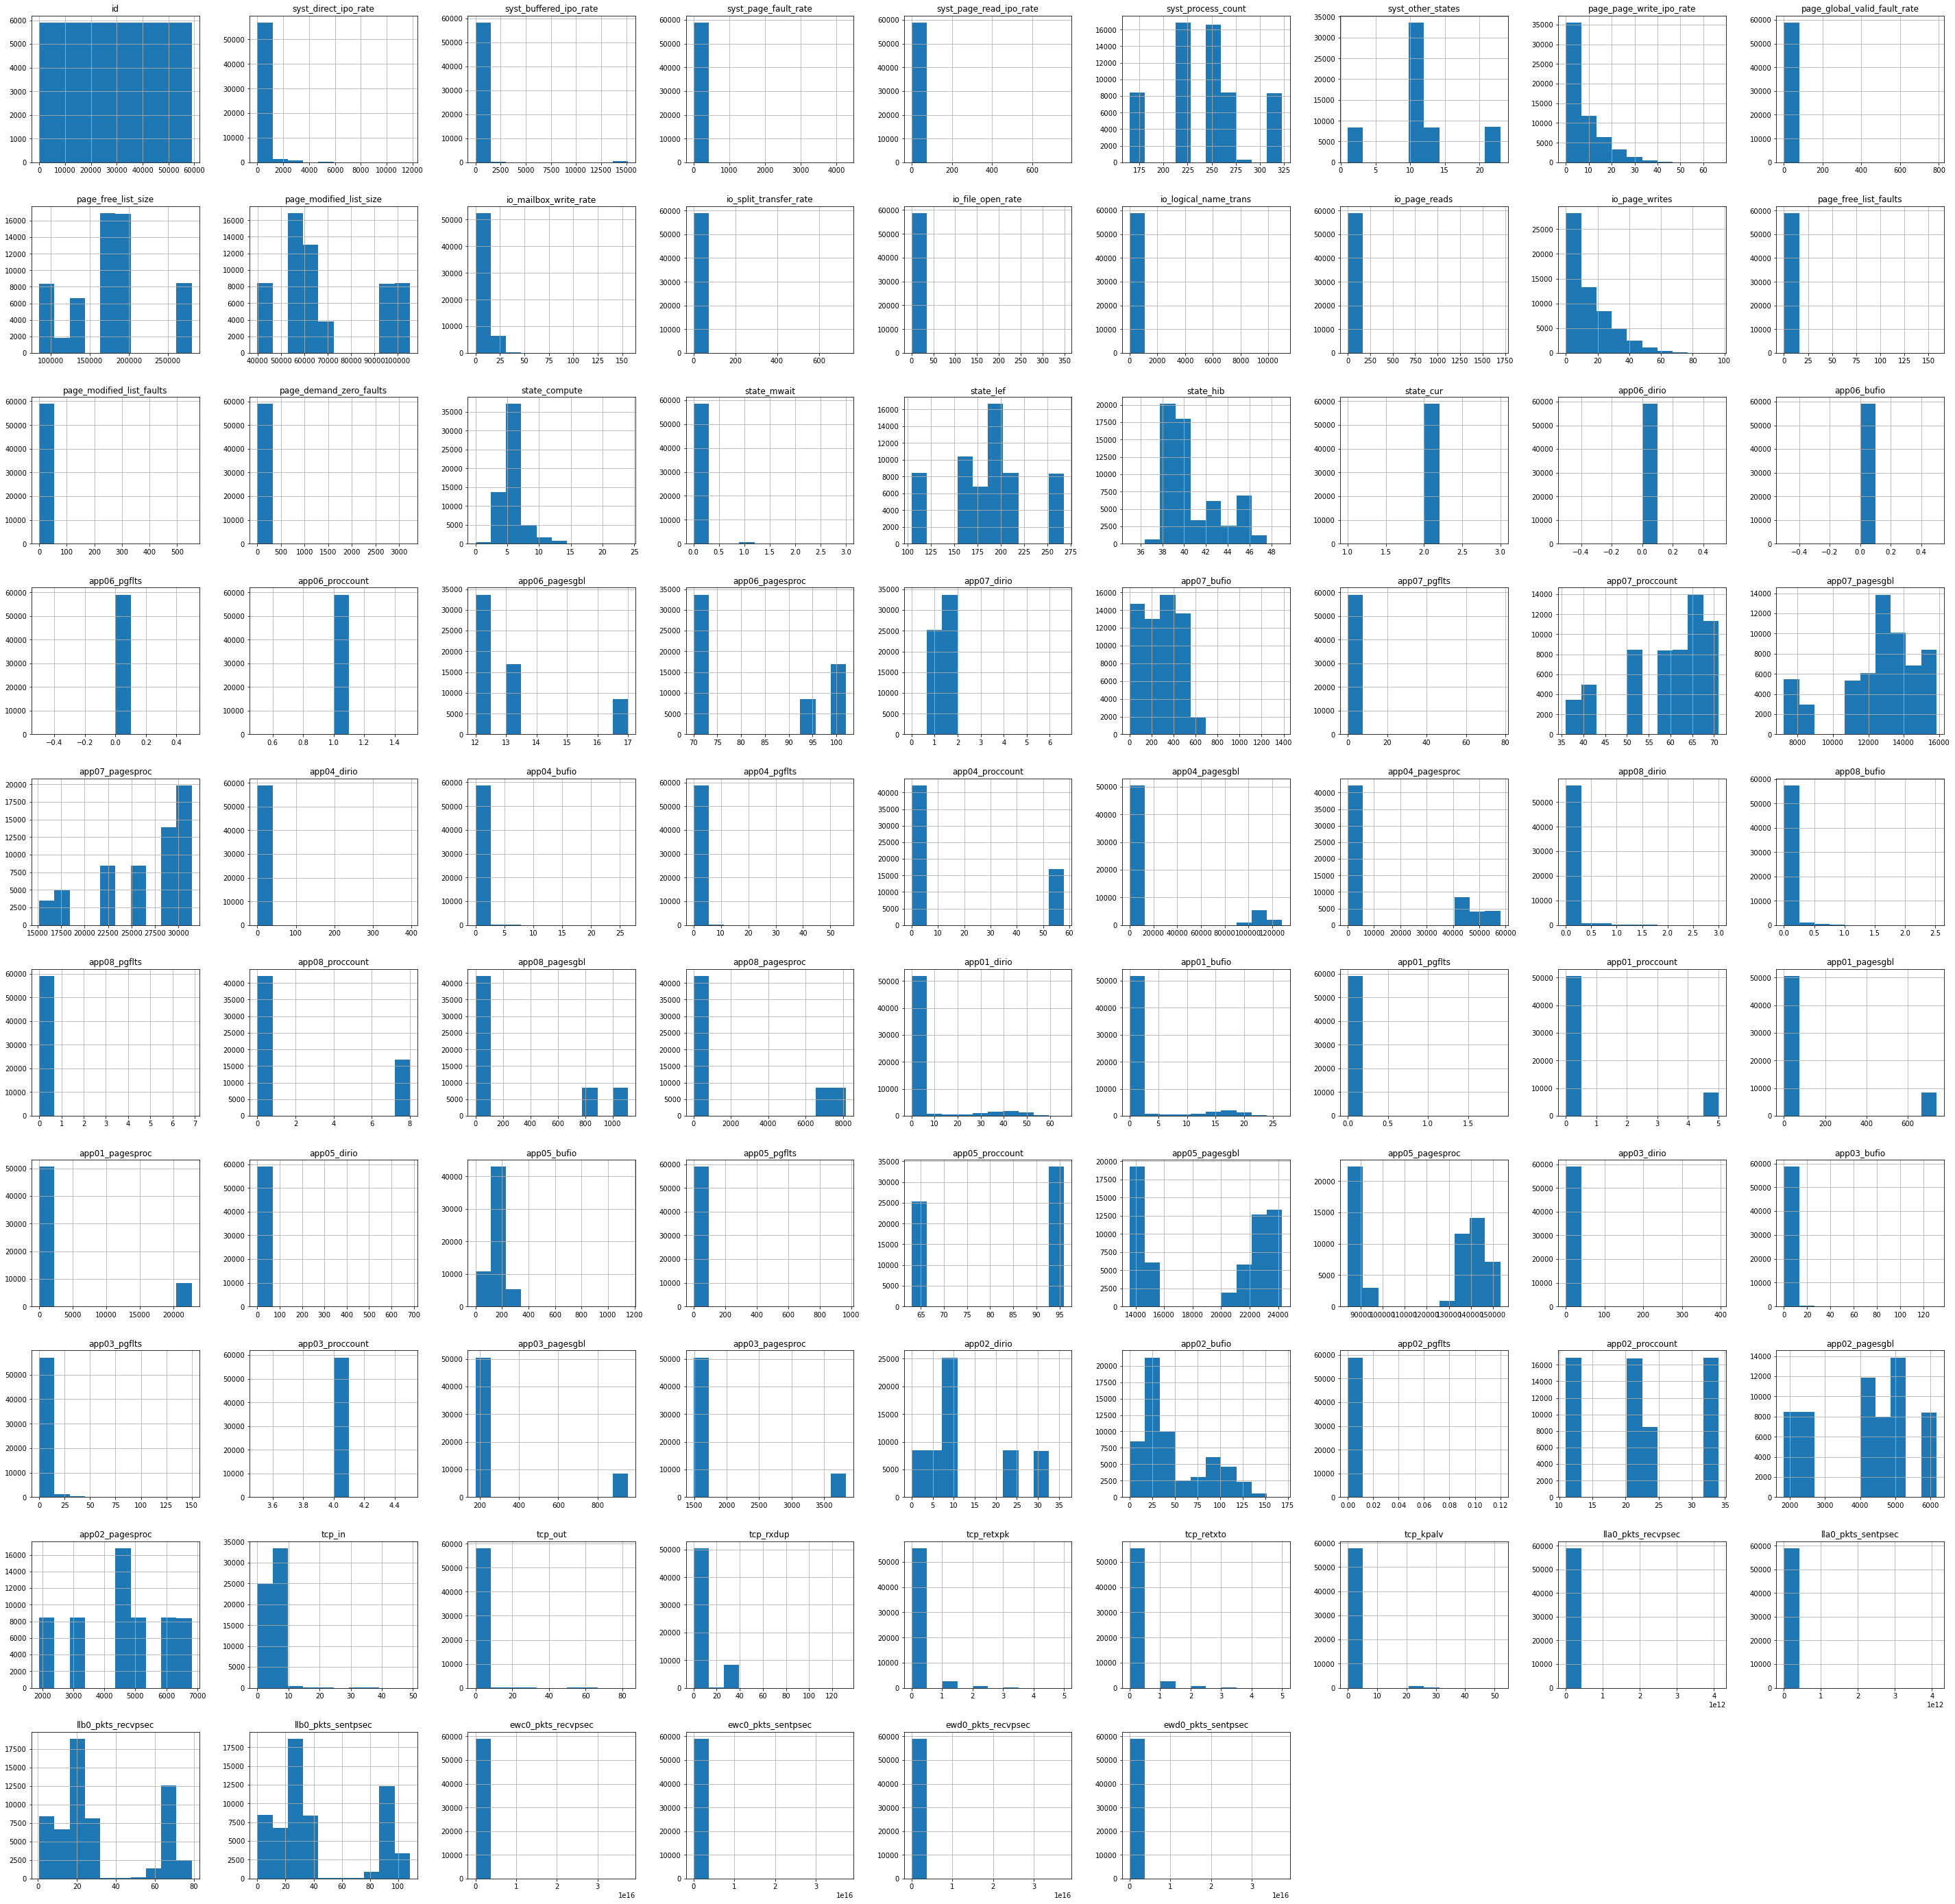

In [ ]:
df1.hist(figsize=(50,50))
plt.show()

## Machine Learning
1. ####   Random Forests 
2. ####   Hist Gradient Boast 
3. ####   Voting Classifier 

In [ ]:
# Check if there are null values in the datasets
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [ ]:
X = df.drop(columns = ['m_id','cpu_load'])
y = df['cpu_load']
y.replace(to_replace = ['low', 'medium', 'high'], value = [0,1,2], inplace = True)

In [ ]:
rand_f_1 = HistGradientBoostingClassifier(learning_rate=0.08,early_stopping = False ,max_iter = 300, l2_regularization = 1)
rand_f_2 = RandomForestClassifier(n_estimators = 300 ,criterion = 'entropy',max_depth = 18, max_features = 30 , random_state = 0)
eclf1 = VotingClassifier(estimators=[ ('hg', rand_f_1), ('rf', rand_f_2) ], voting='soft')

In [ ]:
eclf1.fit(X, y)

VotingClassifier(estimators=[('hg',
                              HistGradientBoostingClassifier(early_stopping=False,
                                                             l2_regularization=1,
                                                             learning_rate=0.08,
                                                             max_iter=300)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=18,
                                                     max_features=30,
                                                     n_estimators=300,
                                                     random_state=0))],
                 voting='soft')

In [ ]:

y_pred_1 = eclf1.predict(X)


In [ ]:
accuracy_score(y_pred_1,y)

0.9715650097677447

In [ ]:
y_pred = eclf1.predict_proba(X)

In [ ]:
log_loss(y,y_pred)

0.09870403198142975

In [ ]:
y_pred

array([[1.23372822e-01, 8.75872239e-01, 7.54938162e-04],
       [2.07361925e-02, 9.79201301e-01, 6.25065016e-05],
       [9.98735381e-01, 1.25816397e-03, 6.45511059e-06],
       ...,
       [4.56624888e-06, 9.91609718e-01, 8.38571579e-03],
       [6.35893950e-06, 2.31044733e-01, 7.68948908e-01],
       [9.68462186e-01, 3.14839274e-02, 5.38870834e-05]])

## Exploring and Preprocessing the test data :- 

In [ ]:
df1.head

<bound method NDFrame.head of           id m_id  syst_direct_ipo_rate  syst_buffered_ipo_rate  \
0          0    f                 30.20                  335.77   
1          1    a                 75.30                  665.08   
2          2    c                 31.02                  251.00   
3          3    e                 38.78                  493.92   
4          4    b                 62.83                  379.27   
...      ...  ...                   ...                     ...   
58993  58993    g                 33.08                  502.40   
58994  58994    b                 90.98                  617.57   
58995  58995    c                 37.90                  343.73   
58996  58996    b                 60.68                  686.57   
58997  58997    a                 59.42                  388.78   

       syst_page_fault_rate  syst_page_read_ipo_rate  syst_process_count  \
0                      0.00                     0.00                 165   
1            

In [ ]:
df1.columns

Index(['id', 'm_id', 'syst_direct_ipo_rate', 'syst_buffered_ipo_rate',
       'syst_page_fault_rate', 'syst_page_read_ipo_rate', 'syst_process_count',
       'syst_other_states', 'page_page_write_ipo_rate',
       'page_global_valid_fault_rate', 'page_free_list_size',
       'page_modified_list_size', 'io_mailbox_write_rate',
       'io_split_transfer_rate', 'io_file_open_rate', 'io_logical_name_trans',
       'io_page_reads', 'io_page_writes', 'page_free_list_faults',
       'page_modified_list_faults', 'page_demand_zero_faults', 'state_compute',
       'state_mwait', 'state_lef', 'state_hib', 'state_cur', 'app06_dirio',
       'app06_bufio', 'app06_pgflts', 'app06_proccount', 'app06_pagesgbl',
       'app06_pagesproc', 'app07_dirio', 'app07_bufio', 'app07_pgflts',
       'app07_proccount', 'app07_pagesgbl', 'app07_pagesproc', 'app04_dirio',
       'app04_bufio', 'app04_pgflts', 'app04_proccount', 'app04_pagesgbl',
       'app04_pagesproc', 'app08_dirio', 'app08_bufio', 'app08_pgflts'

In [ ]:
df1.describe()

,id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
count,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,58998.000000,...,58998.000000,58998.000000,5.899800e+04,5.899800e+04,58998.000000,58998.000000,5.899800e+04,5.899800e+04,5.899800e+04,5.899800e+04
mean,29498.500000,161.127289,683.133364,6.444680,1.312928,243.704346,10.866301,7.253781,2.058478,176926.382657,...,0.075358,0.507678,1.396635e+08,4.189919e+08,31.196868,42.261840,5.710567e+12,1.205517e+13,8.248240e+12,9.517566e+12
std,17031.399928,538.963944,1433.785655,69.685714,18.407846,43.327079,5.448848,8.237644,20.341256,53414.760449,...,0.332155,3.480275,2.398730e+10,4.154605e+10,24.241745,33.204275,4.622852e+14,6.716279e+14,5.555789e+14,5.967773e+14
min,0.000000,0.000000,0.000000,0.000000,0.000000,165.000000,1.000000,0.000000,0.000000,84887.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.617000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,14749.250000,34.080000,350.470000,0.000000,0.000000,217.000000,10.000000,0.320000,0.000000,132958.000000,...,0.000000,0.000000,3.192000e+02,3.567710e+02,16.200000,21.583000,2.632210e+02,2.460670e+02,2.550330e+02,2.443170e+02
50%,29498.500000,42.750000,557.790000,0.000000,0.000000,247.000000,10.000000,4.500000,0.000000,177366.000000,...,0.000000,0.000000,3.871750e+02,4.644330e+02,21.633000,28.983000,3.286500e+02,3.037670e+02,3.179250e+02,3.011250e+02
75%,44247.750000,70.230000,711.395000,0.020000,0.000000,271.000000,12.000000,11.150000,0.000000,197851.000000,...,0.000000,0.000000,4.596290e+02,5.534670e+02,64.367000,88.583000,4.193000e+02,3.948957e+02,4.103500e+02,3.994127e+02
max,58997.000000,11781.550000,15158.670000,4272.350000,758.320000,323.000000,23.000000,66.600000,787.620000,280786.000000,...,5.000000,52.000000,4.119983e+12,4.119984e+12,78.900000,108.267000,3.743147e+16,3.743147e+16,3.743147e+16,3.743147e+16


In [ ]:
X_test_new = df1.drop(columns = ['id','m_id'])

In [ ]:
X_test_new.head()

,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
0,30.20,335.77,0.00,0.00,165,10,0.00,0.00,280348,40113,...,0,0,410.567,259.683,0.717,0.017,229.117,375.250,272.233,201.167
1,75.30,665.08,30.33,4.53,271,12,9.83,13.45,135805,101499,...,1,0,484.250,516.700,67.817,89.483,666.533,554.267,496.233,387.850
2,31.02,251.00,0.00,0.00,259,22,0.38,0.00,171796,60556,...,0,0,242.300,251.150,15.483,20.767,229.800,220.300,315.483,277.767
3,38.78,493.92,0.05,0.00,252,10,7.65,0.05,172948,67821,...,0,0,394.900,515.850,25.033,34.550,302.733,230.600,308.483,273.650
4,62.83,379.27,0.00,0.00,318,10,0.27,0.00,88866,93458,...,0,0,332.467,290.283,66.050,93.083,226.067,331.033,228.017,233.450


In [ ]:
y_pred = eclf1.predict_proba(X_test_new)

In [ ]:
y_pred

array([[9.98121555e-01, 1.87013679e-03, 8.30857759e-06],
       [3.30685179e-02, 9.66763384e-01, 1.68098401e-04],
       [9.99623945e-01, 3.31998802e-04, 4.40560421e-05],
       ...,
       [9.18243395e-01, 8.13175119e-02, 4.39092878e-04],
       [5.62214053e-04, 9.98803729e-01, 6.34056616e-04],
       [9.88590166e-01, 9.62846353e-03, 1.78137021e-03]])

In [ ]:
a = pd.DataFrame()
a['low'] = y_pred[:,0]
a['medium'] = y_pred[:,1]
a['high'] = y_pred[:,2]
a['id'] = df1['id']
a.set_index("id",inplace = True)
a


,low,medium,high
id,,,
0,0.998122,0.001870,0.000008
1,0.033069,0.966763,0.000168
2,0.999624,0.000332,0.000044
3,0.745270,0.254506,0.000224
4,0.999842,0.000104,0.000054
...,...,...,...
58993,0.069351,0.930432,0.000217
58994,0.173964,0.795023,0.031014
58995,0.918243,0.081318,0.000439


In [ ]:
#print the .csv file 
test.to_csv("./kaggle67.csv")

## Conclusion - 

1. #### Best parameter for Random forest classifier - n_estimator = 300 ,criterion = 'entropy',max_depth = 18, max_features = 30, random_state =0.
2. #### Best parameter for Hist Gradient Boast classfier - learning_rate=0.08,max_iter = 300, l2_regularization = 1, random_state = 0 , early_stopping = False.
